In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using SymPy  # Para el cálculo simbólico de límites.
using Plots  # Para el dibujo de gráficas.
#plotlyjs() # Para obtener gráficos interactivos.
using MTH229 # Para restringir la gráfica de una función a su dominio.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.

In [3]:
f(x) = x^2
a = 3
print([f(a+1/10i) for i = 1:10])

[9.610000000000001, 9.302499999999998, 9.20111111111111, 9.150625, 9.1204, 9.100277777777777, 9.085918367346938, 9.075156250000001, 9.06679012345679, 9.060099999999998]

In [4]:
print([f(a-1/10i) for i = 1:10])

[8.41, 8.7025, 8.801111111111112, 8.850625, 8.8804, 8.900277777777777, 8.914489795918367, 8.925156249999999, 8.933456790123458, 8.940100000000001]

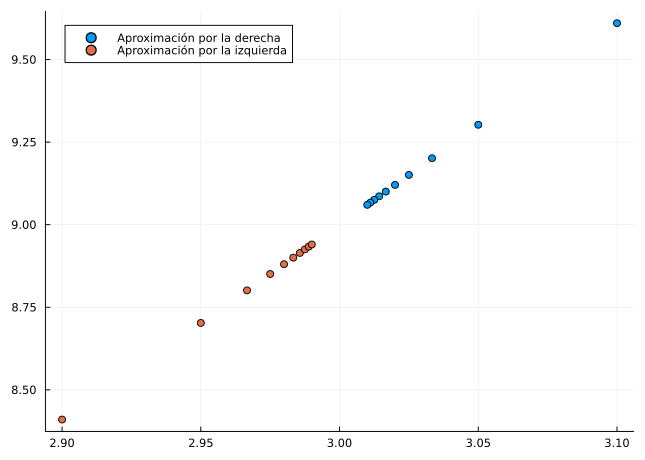

In [5]:
xd = [a+1/10i for i=1:10]
scatter(xd, f.(xd), label="Aproximación por la derecha")
xi = [a-1/10i for i=1:10]
scatter!(xi, f.(xi), label="Aproximación por la izquierda", legend=:topleft)

In [6]:
@syms x::real
li = limit(f(x), x=>3, dir="-")
println("Límite por la izquierda: ", li)
ld = limit(f(x), x=>3, dir="+")
println("Límite por la derecha: ", ld)

Límite por la izquierda: 9
Límite por la derecha: 9


In [7]:
g(x) = (1+x)^(1/x)
a = 0
print([g(a+1/10^i) for i = 1:10])

[2.5937424601000023, 2.7048138294215285, 2.7169239322355936, 2.7181459268249255, 2.718268237192297, 2.7182804690957534, 2.7182816941320813, 2.7182817983473577, 2.71828205201156, 2.7182820532347876]

In [8]:
print([g(a-1/10^i) for i = 1:10])

[2.867971990792441, 2.7319990264290284, 2.7196422164428524, 2.71841775501015, 2.718295419980405, 2.7182831876793716, 2.7182819629423656, 2.7182818557091664, 2.7182817529399266, 2.718282053506616]

In [9]:
@syms x::real
li = limit(g(x), x=>0, dir="-")
println("Límite por la izquierda: ", li)
ld = limit(g(x), x=>0, dir="+")
println("Límite por la derecha: ", ld)

Límite por la izquierda: E
Límite por la derecha: E


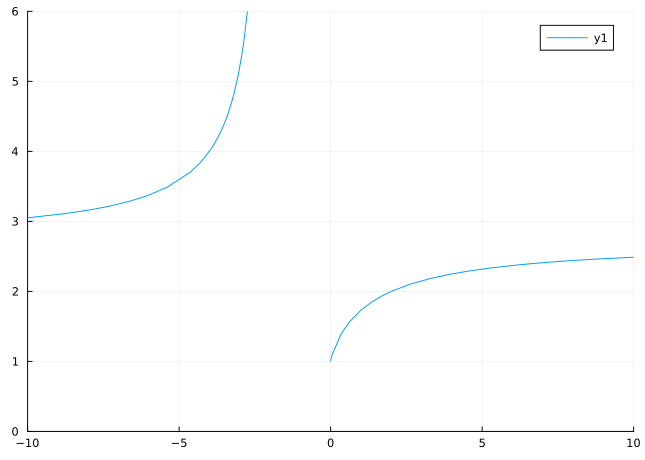

In [10]:
using Plots
f(x) = (1+2/x)^(x/2)
plot(f, xlims=(-10,10), ylims=(0,6))

In [11]:
using SymPy
@syms x::real
println("Límite por la izquieda en -2: ", limit(f(x), x=>-2, dir="-"))
println("Límite por la derecha en -2: ", limit(f(x), x=>-2, dir="+"))
println("Límite en -∞: ", limit(f(x), x=>-oo))
println("Límite en ∞: ", limit(f(x), x=>oo))
println("Límite en 2: ", limit(f(x), x=>2))
println("Límite en 0: ", limit(f(x), x=>0))

Límite por la izquieda en -2: oo
Límite por la derecha en -2: 

-oo
Límite en -∞: E
Límite en ∞: E


Límite en 2: 2
Límite en 0: 1


In [12]:
using SymPy
@syms x::real
limit(sin(1/x), x=>0)

<-1, 1>

In [13]:
limit(x*sin(1/x), x=>0)

0

In [14]:
limit(ℯ^(-x)*sin(x), x=>oo)

0

In [15]:
@syms a::real
limit((sin(x)-sin(a))/(x-a), x=>a)

cos(a)

In [16]:
f(x)=sin(x)/x
f(0)

NaN

In [17]:
@syms x::real
f(x)=sin(x)/x
limit(f(x), x=>0)

1

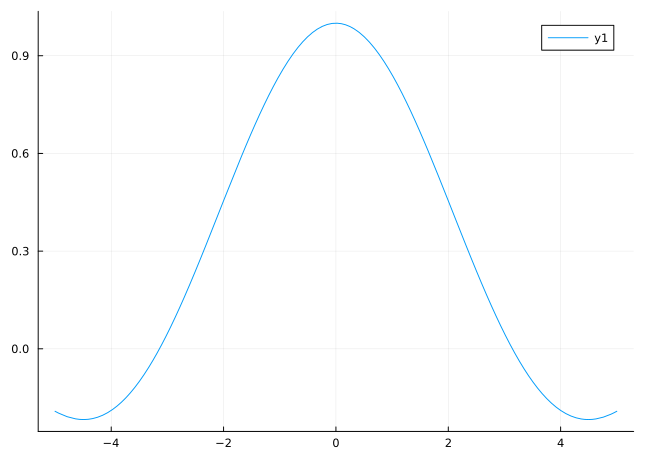

In [18]:
using Plots
plot(f)

In [19]:
g(x)=cos(x)/(x-pi/2)
g(pi/2)

Inf

In [20]:
limit(g(x), x=>pi/2)

-0.0172353714634390

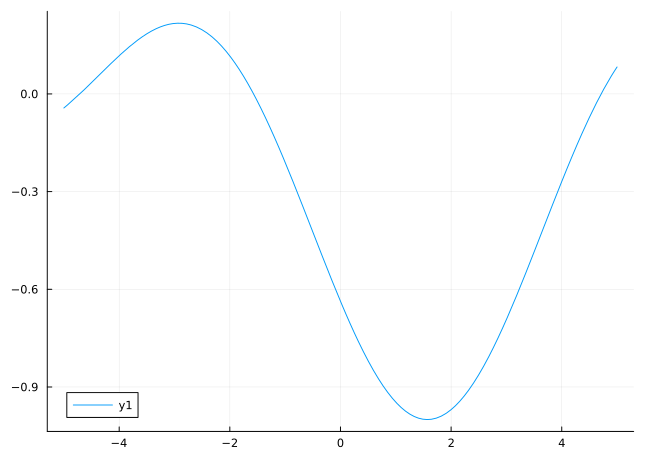

In [21]:
using Plots
plot(g)

In [22]:
g(x)=cos(x)/(x-Sym(pi)/2)
limit(g(x), x=>Sym(pi)/2)

-1

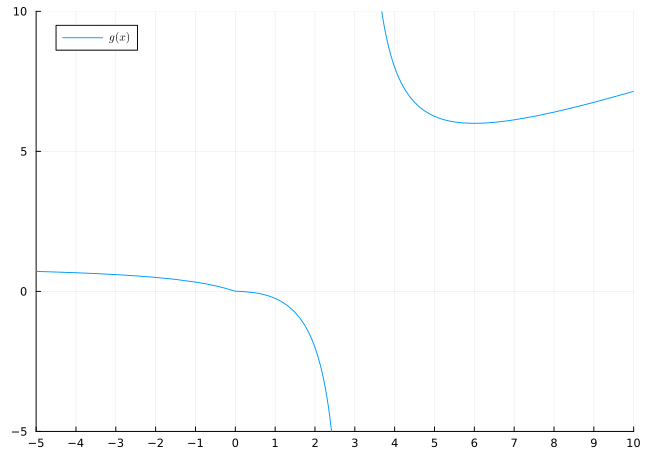

In [23]:
using Plots, MTH229, LaTeXStrings
@syms x::real
g1(x) = x/(x-2)
g2(x) = x^2/(2x-6)
g(x) = x<=0 ? g1(x) : g2(x)
plot(rangeclamp(g), xlims=(-5,10), ylims=(-5,10), xticks=-5:10, label = L"g(x)", legend=:topleft)

In [24]:
println("Puntos fuera del dominio de la rama negativa: ", solve(x-2))
println("Puntos fuera del dominio de la rama positiva: ", solve(2x-6))

Puntos fuera del dominio de la rama negativa: Sym

[2]
Puntos fuera del dominio de la rama positiva: Sym[3]


In [25]:
println("Límte en 3 por la izquierda: ", limit(g(x), x=>3, dir="-"))
println("Límte en 3 por la derecha: ", limit(g(x), x=>3, dir="+"))

Límte en 3 por la izquierda: -oo
Límte en 3 por la derecha: oo


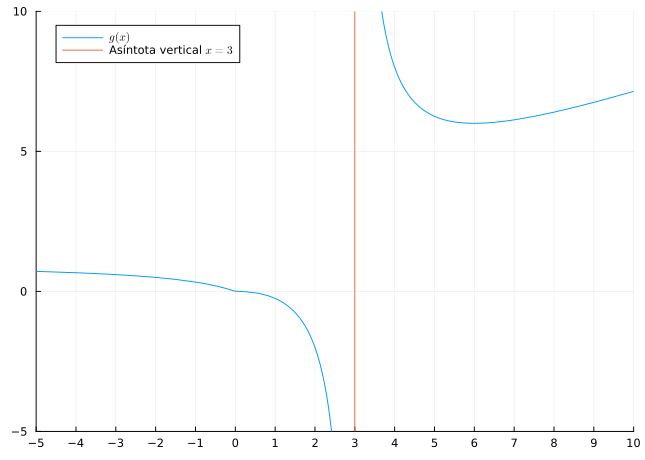

In [26]:
vline!([3], label = L"Asíntota vertical $x=3$")

In [27]:
println("Límite en -∞: ", limit(g1(x), x=>-oo))
println("Límite en ∞: ", limit(g2(x), x=>oo))

Límite en -∞: 1
Límite en ∞: oo


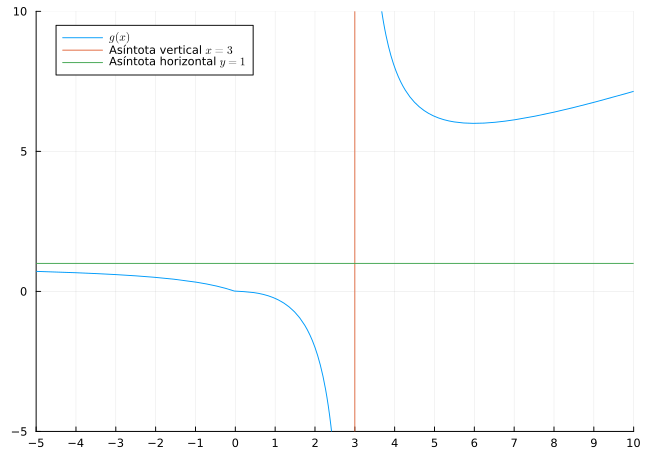

In [28]:
hline!([1], label = L"Asíntota horizontal $y=1$")

In [29]:
limit(g2(x)/x, x=>oo)

1/2

In [30]:
limit(g2(x)-x/2, x=>oo)

3/2

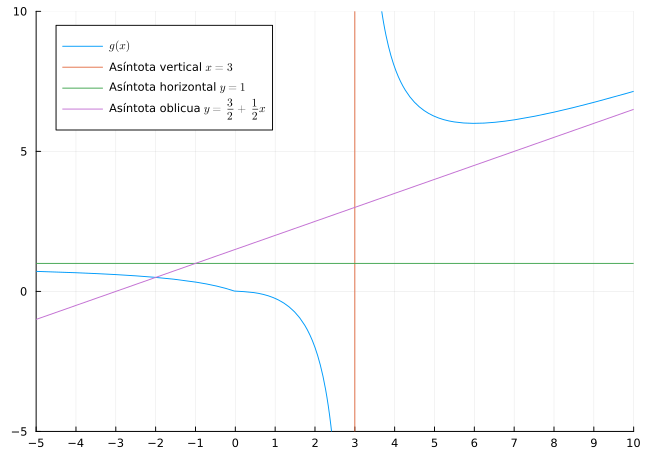

In [31]:
plot!(3/2+x/2, label = L"Asíntota oblicua $y=\frac{3}{2}+\frac{1}{2}x$")

In [32]:
@syms x::real a::real
h1(x) = (2x^2-2x)/(3x^2+x)
h2(x) = (tan(x)-a*x)/x 
l1 = limit(h1(x), x=>0, dir="-")
l2 = limit(h2(x),x=>0, dir="+")
solve(Eq(l1,l2))

1-element Vector{Sym}:
 3

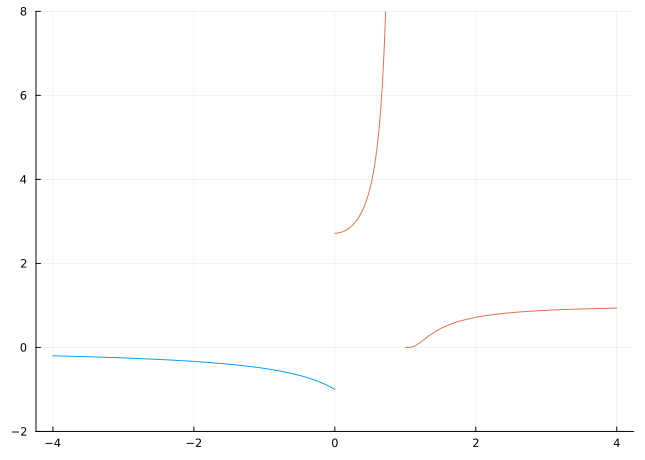

In [33]:
using Plots, MTH229, LaTeXStrings
@syms x::real
f1(x) = (x+1)/(x^2-1)
f2(x) = 1/exp(1/(x^2-1))
plot(f1, -4, 0, ylim=(-2,8), legend=false)
plot!(rangeclamp(f2), 0, 4)

In [34]:
solve(x^2-1)

2-element Vector{Sym}:
 -1
  1

In [35]:
println("Límite en -1 por la izquierda: ", limit(f1(x), x=> -1, dir="-"))
println("Límite en -1 por la derecha: ", limit(f1(x), x=> -1, dir="+"))

Límite en -1 por la izquierda: -1/2
Límite en -1 por la derecha: -1/2


In [36]:
println("Límite en 1 por la izquierda: ", limit(f2(x), x=>1, dir="-"))
println("Límite en 1 por la derecha: ", limit(f2(x), x=>1, dir="+"))

Límite en 1 por la izquierda: oo
Límite en 1 por la derecha: 

0


In [37]:
println("Límite en 1 por la izquierda: ", limit(f1(x), x=>0, dir="-"))
println("Límite en 1 por la derecha: ", limit(f2(x), x=>0, dir="+"))

Límite en 1 por la izquierda: -1
Límite en 1 por la derecha: E


In [38]:
function raices_biseccion(f, a, b, error=1e-10)
  if f(a) == 0 return(a) end
  if f(b) == 0 return(b) end
  if f(a) * f(b) > 0 error("Las imágenes de los extremos del intervalo no tienen signo distinto.") end
  c = (a+b)/2
  while abs(b-a) > error
    if f(c) == 0 return(c) end
    if f(a) * f(c) < 0
       b = c
    else
       a = c
    end
    c = (a+b)/2
  end
  c
end

f(x)=x^5+3x^4-2x^3+6x-4
print(raices_biseccion(f, 0, 1))

0.6496996753558051

In [39]:
#| echo: false
using QuizQuestions
nothing

In [40]:
#| echo: false
f(x) = (1+1/x)^x
numericq(f(12), 1e-10, hint="Introducir hasta 10 decimales")

QuizQuestions.Numericq(2.6130352902246763, 1.0e-10, "", "", "Introducir hasta 10 decimales", "", nothing)

In [41]:
#| echo: false
f(x) = (1+1/x)^x
numericq(f(365), 1e-10, hint="Introducir hasta 10 decimales")

QuizQuestions.Numericq(2.7145674820219727, 1.0e-10, "", "", "Introducir hasta 10 decimales", "", nothing)

In [42]:
#| echo: false
choices = ("3", "2.7182818284590", "e", L"e^2", L"e^{-1}")
answer = 3
radioq(choices, answer)

QuizQuestions.Radioq(("e", "2.7182818284590", L"$e^{-1}$", "3", L"$e^2$"), 1, [1, 2, 3, 4, 5], ("e", "2.7182818284590", L"$e^{-1}$", "3", L"$e^2$"), "", "", "", false)

In [43]:
#| echo: false
@syms x::real
f(x) = (sin(x)-cos(x))/(1-tan(x))
l = N(limit(f(x), x => PI/4))
numericq(l, 1e-5)

QuizQuestions.Numericq(-0.707106781186547524400844362104849039284835937688474036588339868995366239231051, 1.0e-5, "", "", "", "", nothing)

In [44]:
#| echo: false
@syms x::real
f(x) = sqrt(x^2+x+1)-sqrt(x^2-2x-1)
l = float(limit(f(x), x=>oo))
numericq(l)

QuizQuestions.Numericq(1.5, 0.001, "", "", "", "", nothing)

In [45]:
#| echo: false
choices = (L"$\infty$", L"$-\infty$", L"1", "0", "NaN")
answer = 2
radioq(choices, answer)

QuizQuestions.Radioq(("NaN", "0", L"$\infty$", L"$-\infty$", L"$1$"), 4, [1, 2, 3, 4, 5], ("NaN", "0", L"$\infty$", L"$-\infty$", L"$1$"), "", "", "", false)

In [46]:
#| echo: false
choices = (L"1/a", L"e^a", L"$\sqrt{a}$", L"\ln(a)", "Las otras opciones son falsas.")
answer = 4
radioq(choices, answer)

QuizQuestions.Radioq((L"$e^a$", L"$\ln(a)$", "Las otras opciones son falsas.", L"$\sqrt{a}$", L"$1/a$"), 2, [1, 2, 3, 4, 5], (L"$e^a$", L"$\ln(a)$", "Las otras opciones son falsas.", L"$\sqrt{a}$", L"$1/a$"), "", "", "", false)

In [47]:
#| echo: false
choices = (L"$x=-1$", L"$y=1$", L"$y=3x+1$", L"$y=\frac{1}{3}+\frac{1}{3}x$", L"$y=\frac{x-1}{3}$")
answers = [1,5]
multiq(choices, answers)

QuizQuestions.Multiq((L"$x=-1$", L"$y=3x+1$", L"$y=\frac{1}{3}+\frac{1}{3}x$", L"$y=\frac{x-1}{3}$", L"$y=1$"), [1, 4], [1, 2, 3, 4, 5], (L"$x=-1$", L"$y=3x+1$", L"$y=\frac{1}{3}+\frac{1}{3}x$", L"$y=\frac{x-1}{3}$", L"$y=1$"), "", "", "", false)

In [48]:
#| echo: false
@syms x::real
f(x) = (exp(x)-exp(-x))/x
l = limit(f(x), x=>0)
numericq(l)

QuizQuestions.Numericq(2, 0.001, "", "", "", "", nothing)

In [49]:
#| echo: false
using Latexify
@syms a::real
h1(x) = x^3-x-2
h2(x) = cos(x-PI/4)+a 
l1 = limit(h1(x), x=>0, dir="-")
l2 = limit(h2(x),x=>0, dir="+")
sol=solve(Eq(l1,l2))
choices = (latexify(sol[1]), L"$2-\sqrt{2}$", L"$-2$", L"$-2+\frac{\sqrt{2}}{2}$", L"No hay ningún valor de de $a$ que haga la función continua")
answer = 1
radioq(choices, answer)

QuizQuestions.Radioq((L"$-2 - \frac{\sqrt{2}}{2}$", L"$-2+\frac{\sqrt{2}}{2}$", L"$-2$", L"No hay ningún valor de de $a$ que haga la función continua", L"$2-\sqrt{2}$"), 1, [1, 2, 3, 4, 5], (L"$-2 - \frac{\sqrt{2}}{2}$", L"$-2+\frac{\sqrt{2}}{2}$", L"$-2$", L"No hay ningún valor de de $a$ que haga la función continua", L"$2-\sqrt{2}$"), "", "", "", false)

In [50]:
#| echo: false
choices = ("Evitable", "Salto finito", "Salto infinito", "Segunda especie", "Es continua")
answer = 3
radioq(choices, answer)

QuizQuestions.Radioq(("Evitable", "Segunda especie", "Salto finito", "Es continua", "Salto infinito"), 5, [1, 2, 3, 4, 5], ("Evitable", "Segunda especie", "Salto finito", "Es continua", "Salto infinito"), "", "", "", false)

In [51]:
#| echo: false
f(x) = exp(-x)-cos(x)
sol = raices_biseccion(f, 1, 2, 1e-15)
numericq(sol, 1e-15)

QuizQuestions.Numericq(1.2926957193733988, 1.0e-15, "", "", "", "", nothing)